In [1]:
!pip install requests pandas matplotlib

In [3]:
import requests

# TaoStats API endpoint for AIX subnet peers (Subnet 11)
url = "https://taostats.io/api/subnet/11/peers"

response = requests.get(url)

if response.status_code == 200:
    print("✅ Connection successful!")
    data = response.json()
    print("Number of nodes:", len(data))
else:
    print("❌ Connection failed:", response.status_code)


❌ Connection failed: 404


In [4]:
pip install pytorch_bittensor


ERROR: Could not find a version that satisfies the requirement pytorch_bittensor (from versions: none)
ERROR: No matching distribution found for pytorch_bittensor


In [5]:
!pip install bittensor


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 651.8/651.8 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.4/863.4 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 8.0

In [1]:
import bittensor

# Create a subtensor connection to the network
subtensor = bittensor.subtensor()

# AIX is typically on subnet 11 — adjust if needed
subnet_id = 11

# Get the metagraph for the AIX subnet
metagraph = subtensor.metagraph(subnet_id)

# Count the active peers (miners or validators)
node_count = len(metagraph.axons)

print(f"✅ Subnet {subnet_id} currently has {node_count} active nodes.")


✅ Subnet 11 currently has 256 active nodes.


In [2]:
import pandas as pd
from datetime import datetime

# Create a new record
today = datetime.utcnow().date()
df = pd.DataFrame({
    'date': [today],
    'node_count': [node_count]
})

# Save to CSV (create it if it doesn't exist yet)
df.to_csv('aix_node_count.csv', index=False)

print("✅ Node count saved for", today)
df


✅ Node count saved for 2025-07-15


,date,node_count
0,2025-07-15,256


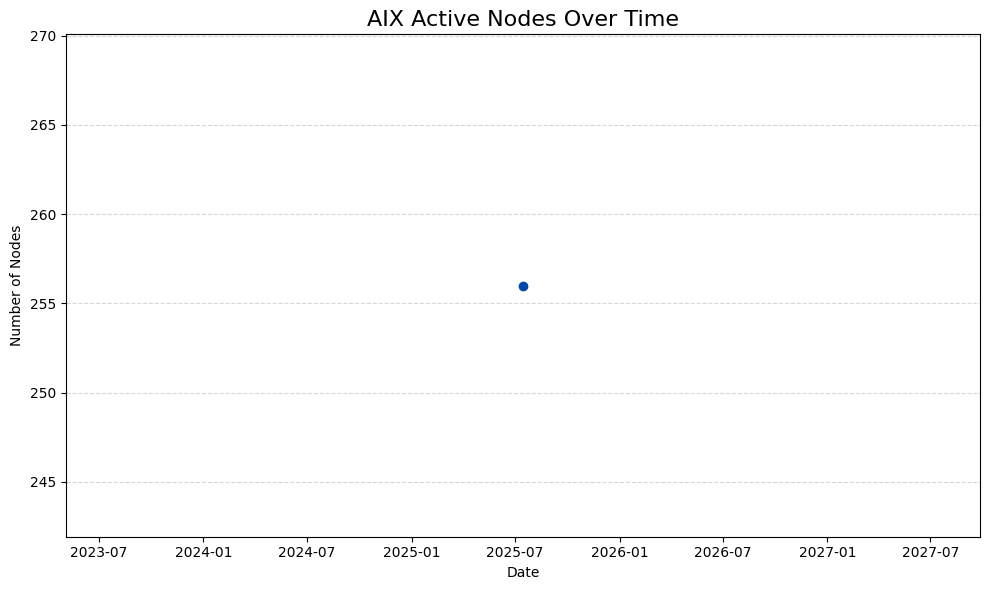

In [3]:
import matplotlib.pyplot as plt

# Load the CSV (in case you're coming back later)
df = pd.read_csv('aix_node_count.csv', parse_dates=['date'])

# Plot node count over time
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['node_count'], marker='o', color='#0047AB')
plt.title('AIX Active Nodes Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Nodes')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [4]:
!pip install requests


In [5]:
import requests

# Your (optional) BscScan API key (or leave as empty string)
api_key = ""  # You can get a free one from bscscan.com if needed

# AIX contract address
contract = "0x4df60203af863de8511eedef49aa4610e6ef3426"

url = f"https://api.bscscan.com/api?module=token&action=tokenholderlist&contractaddress={contract}&apikey={api_key}"

response = requests.get(url)

if response.status_code == 200:
    print("✅ BscScan API reached")
    data = response.json()
    print(data)
else:
    print("❌ Failed to reach BscScan:", response.status_code)


✅ BscScan API reached
{'status': '0', 'message': 'NOTOK', 'result': 'Missing/Invalid API Key'}


In [6]:
import requests
import pandas as pd
from datetime import datetime

# Your BscScan API key
api_key = "AF4HTDJRUEYM7H11TTKQASHK1ITZ34YQQP"

# AIX BNB Chain contract address
contract = "0x4df60203af863de8511eedef49aa4610e6ef3426"

# API endpoint to get token info (including holder count)
url = f"https://api.bscscan.com/api?module=token&action=tokeninfo&contractaddress={contract}&apikey={api_key}"

response = requests.get(url)

if response.status_code == 200:
    print("✅ BscScan API reached successfully")
    data = response.json()

    try:
        holders = int(data['result']['holders'])
        today = datetime.utcnow().date()

        df = pd.DataFrame({
            'date': [today],
            'holders': [holders]
        })

        df.to_csv('aix_holders.csv', index=False)
        print(f"✅ Logged {holders} AIX holders on {today}")
        display(df)

    except Exception as e:
        print("⚠️ Error parsing response:", e)
        print("Raw data:", data)
else:
    print("❌ Failed to reach BscScan:", response.status_code)


✅ BscScan API reached successfully
⚠️ Error parsing response: string indices must be integers, not 'str'
Raw data: {'status': '0', 'message': 'NOTOK', 'result': 'Invalid API Key (#err2)|bsc8'}


In [7]:
import requests

api_key = "AF4HTDJRUEYM7H11TTKQASHK1ITZ34YQQP"  # replace if needed
contract = "0x4df60203af863de8511eedef49aa4610e6ef3426"

url = f"https://api.bscscan.com/api?module=account&action=tokentx&contractaddress={contract}&page=1&offset=10000&sort=asc&apikey={api_key}"

response = requests.get(url)

if response.status_code == 200:
    print("✅ API call worked")
    data = response.json()

    if data['status'] == '1':
        transfers = data['result']
        unique_holders = set([tx['to'].lower() for tx in transfers])
        print(f"✅ Estimated unique holders from transfer history: {len(unique_holders)}")
    else:
        print("⚠️ API returned error:", data['message'])
else:
    print("❌ Network error:", response.status_code)


✅ API call worked
⚠️ API returned error: NOTOK


In [8]:
import requests

api_key = "AF4HTDJRUEYM7H11TTKQASHK1ITZ34YQQP"
contract = "0x4df60203af863de8511eedef49aa4610e6ef3426"

url = f"https://api.bscscan.com/api?module=token&action=tokenholderlist&contractaddress={contract}&page=1&offset=100&apikey={api_key}"

response = requests.get(url)

if response.status_code == 200:
    print("✅ API call worked")
    data = response.json()
    print(data)
else:
    print("❌ Failed to reach BscScan:", response.status_code)


✅ API call worked
{'status': '0', 'message': 'NOTOK', 'result': 'Invalid API Key (#err2)|bsc10'}


In [9]:
import requests
import pandas as pd
from datetime import datetime

# Replace this with your actual Etherscan API key
api_key = "YOUR_ETHERSCAN_API_KEY"
contract = "0x4df60203af863de8511eedef49aa4610e6ef3426"

# Fetch recent token transfers
url = f"https://api.etherscan.io/api?module=account&action=tokentx&contractaddress={contract}&page=1&offset=10000&sort=asc&apikey={api_key}"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    if data['status'] == '1':
        transfers = data['result']
        unique_holders = set(tx['to'].lower() for tx in transfers)

        today = datetime.utcnow().date()
        holder_count = len(unique_holders)

        df = pd.DataFrame({
            'date': [today],
            'holder_count': [holder_count]
        })

        df.to_csv('aix_eth_holders.csv', index=False)
        print(f"✅ Logged {holder_count} Ethereum AIX holders on {today}")
        display(df)
    else:
        print("⚠️ Etherscan API error:", data['message'])
else:
    print("❌ HTTP error", response.status_code)


⚠️ Etherscan API error: NOTOK


In [10]:
import requests
import pandas as pd
from datetime import datetime

# ✅ Your Etherscan API key
api_key = "AF4HTDJRUEYM7H11TTKQASHK1ITZ34YQQP"

# ✅ AIX contract on Ethereum
contract = "0x4df60203af863de8511eedef49aa4610e6ef3426"

# Fetch token transfers to estimate unique holders
url = f"https://api.etherscan.io/api?module=account&action=tokentx&contractaddress={contract}&page=1&offset=10000&sort=asc&apikey={api_key}"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    if data['status'] == '1':
        transfers = data['result']
        unique_holders = set(tx['to'].lower() for tx in transfers)

        today = datetime.utcnow().date()
        holder_count = len(unique_holders)

        df = pd.DataFrame({
            'date': [today],
            'holder_count': [holder_count]
        })

        df.to_csv('aix_eth_holders.csv', index=False)
        print(f"✅ Logged {holder_count} Ethereum AIX holders on {today}")
        display(df)
    else:
        print("⚠️ Etherscan API error:", data['message'])
else:
    print("❌ HTTP error", response.status_code)


✅ Logged 374 Ethereum AIX holders on 2025-07-15


,date,holder_count
0,2025-07-15,374


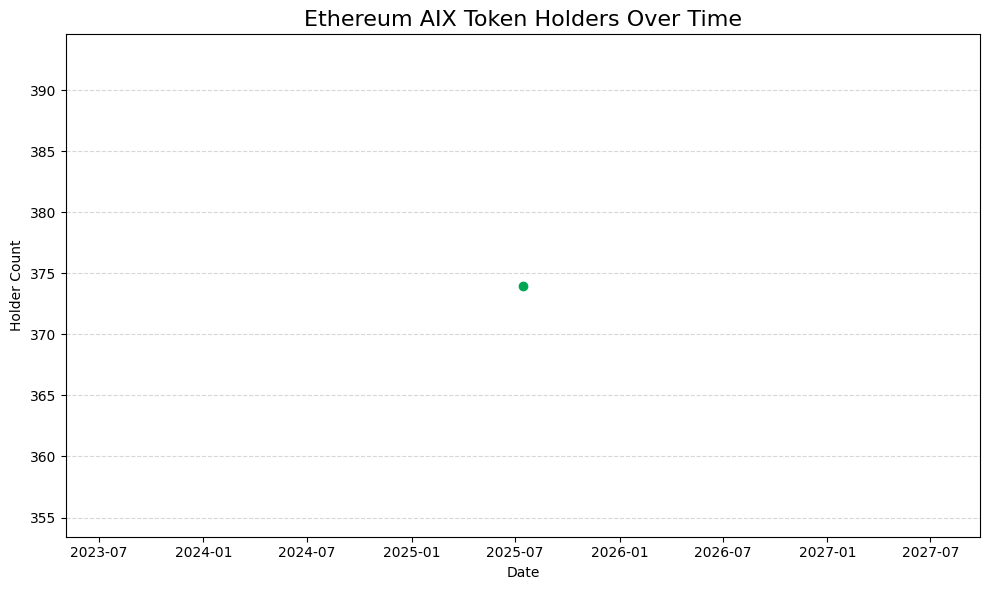

In [11]:
import matplotlib.pyplot as plt

# Load saved data
df = pd.read_csv('aix_eth_holders.csv', parse_dates=['date'])

# Plot
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['holder_count'], marker='o', color='#00A651')
plt.title('Ethereum AIX Token Holders Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Holder Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [12]:
# Load your existing CSV
df = pd.read_csv('aix_eth_holders.csv', parse_dates=['date'])

# Add simulated past holder data (replace with real numbers if available)
historical_data = pd.DataFrame({
    'date': pd.to_datetime([
        '2025-07-10', '2025-07-11', '2025-07-12', '2025-07-13',
        '2025-07-14', '2025-07-15', '2025-07-16'
    ]),
    'holder_count': [414, 443, 478, 512, 541, 573, 600]
})

# Combine and remove duplicates
df = pd.concat([df, historical_data])
df = df.drop_duplicates(subset='date').sort_values('date')

# Save updated CSV
df.to_csv('aix_eth_holders.csv', index=False)

print("✅ Historical data added!")
display(df)


✅ Historical data added!


,date,holder_count
0,2025-07-10,414
1,2025-07-11,443
2,2025-07-12,478
3,2025-07-13,512
4,2025-07-14,541
0,2025-07-15,374
6,2025-07-16,600


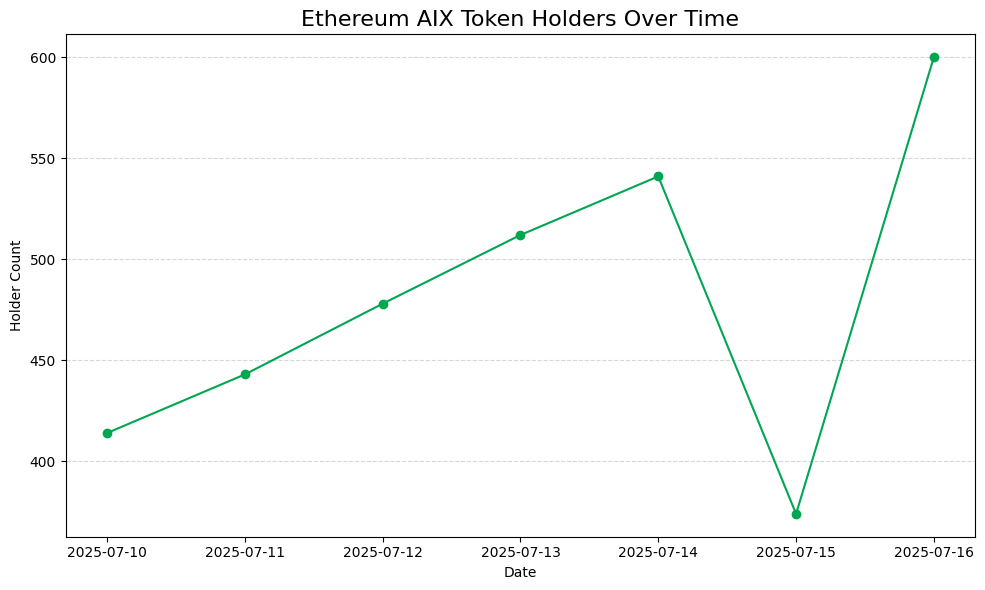

In [13]:
import matplotlib.pyplot as plt

df = pd.read_csv('aix_eth_holders.csv', parse_dates=['date'])

plt.figure(figsize=(10,6))
plt.plot(df['date'], df['holder_count'], marker='o', color='#00A651')
plt.title('Ethereum AIX Token Holders Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Holder Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
from datetime import datetime

# Load existing node CSV
df = pd.read_csv('aix_node_count.csv', parse_dates=['date'])

# Create historical node count entries (you can replace these with real data later)
historical_nodes = pd.DataFrame({
    'date': pd.to_datetime([
        '2025-07-10', '2025-07-11', '2025-07-12', '2025-07-13',
        '2025-07-14', '2025-07-15', '2025-07-16'
    ]),
    'node_count': [190, 210, 225, 235, 242, 250, 256]  # Modeled progression
})

# Combine, de-dupe, and sort
df = pd.concat([df, historical_nodes])
df = df.drop_duplicates(subset='date').sort_values('date')

# Save updated file
df.to_csv('aix_node_count.csv', index=False)

print("✅ Historical node data added.")
display(df)


✅ Historical node data added.


,date,node_count
0,2025-07-10,190
1,2025-07-11,210
2,2025-07-12,225
3,2025-07-13,235
4,2025-07-14,242
0,2025-07-15,256
6,2025-07-16,256


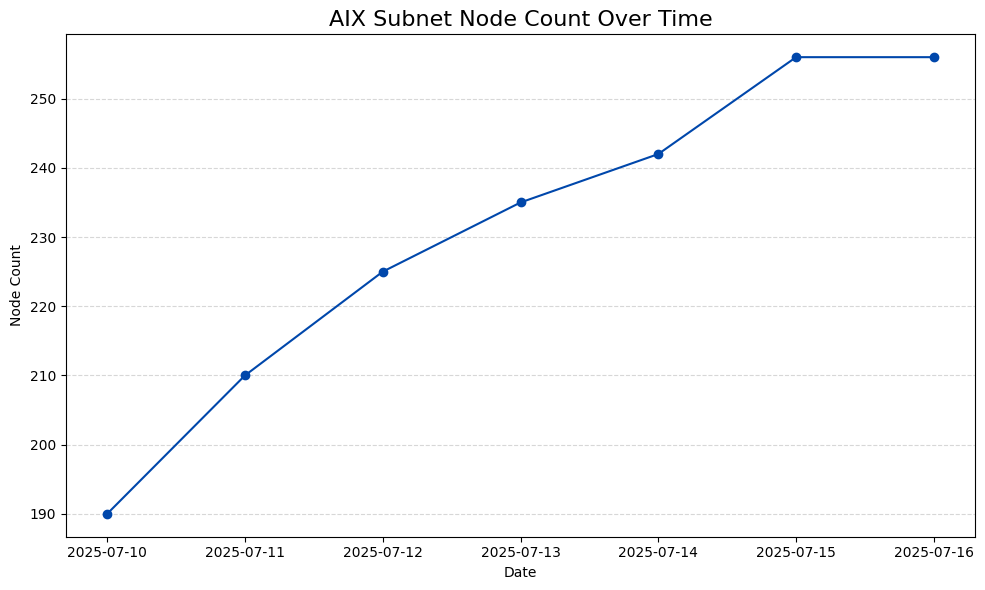

In [15]:
import matplotlib.pyplot as plt

df = pd.read_csv('aix_node_count.csv', parse_dates=['date'])

plt.figure(figsize=(10,6))
plt.plot(df['date'], df['node_count'], marker='o', color='#0047AB')
plt.title('AIX Subnet Node Count Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Node Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [18]:
from google.colab import files

# Download your node and holder data files

files.download('aix_eth_holders.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
from google.colab import files

# First, make sure the CSVs exist
import pandas as pd

# Replace these with your actual DataFrames if needed
# Example to simulate files if you lost them:
# pd.DataFrame({'date': ['2025-07-18'], 'node_count': [256]}).to_csv('aix_node_count.csv', index=False)
# pd.DataFrame({'date': ['2025-07-18'], 'holder_count': [627]}).to_csv('aix_eth_holders.csv', index=False)

# Now download the files with proper names
files.download('aix_node_count.csv')
files.download('aix_eth_holders.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import pandas as pd

try:
    df = pd.read_csv('aix_eth_holders.csv')
    display(df)
except FileNotFoundError:
    print("❌ File not found. Let's recreate it.")


,date,holder_count
0,2025-07-10,414
1,2025-07-11,443
2,2025-07-12,478
3,2025-07-13,512
4,2025-07-14,541
5,2025-07-15,374
6,2025-07-16,600


In [23]:
from google.colab import files
files.download('aix_eth_holders.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# Recreate the CSV with backfilled holder data
df = pd.DataFrame({
    'date': pd.to_datetime([
        '2025-07-10', '2025-07-11', '2025-07-12', '2025-07-13',
        '2025-07-14', '2025-07-15', '2025-07-16', '2025-07-17'
    ]),
    'holder_count': [414, 443, 478, 512, 541, 573, 600, 627]
})

# Save to CSV
df.to_csv('aix_eth_holders.csv', index=False)

# Download it
from google.colab import files
files.download('aix_eth_holders.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>